# Portfolio 4 - Analysis of Airline Passenger Satisfaction
Quoc Phong (Leo) Nguyen

Student ID: 48203971

### Introduction
In the fiercely competitive airline industry, passenger satisfaction emerges as a critical determinant of an airline’s success. With millions flying daily, understanding and enhancing the passenger experience is paramount. This project utilizes a comprehensive dataset of over 120,000 passenger reviews to explore the factors influencing satisfaction. By applying data analytics and machine learning techniques, we aim to identify the key patterns and provide insights into passenger satisfaction within the airline industry.

### Project Structure
Our analysis is structured around focused objectives that emphasize data-driven insights:

- __Identifying Key Factors__: We will focus on identifying the key factors strongly correlated with passenger satisfaction and assess their predictive power in determining satisfaction levels.

- __Data Preparation and Exploration__: The initial stages involve meticulous data preparation and exploratory analysis. The dataset, hosted on [Kaggle](https://www.kaggle.com/datasets/mikhail1681/airline-quality-ratings/data), will be cleaned and preprocessed. This phase aims to uncover initial insights and prepare the data for in-depth analysis.

- __Predictive Modeling__: The core of our project is to develop a machine-learning model can predict passenger satisfaction (whether they are _satisfied_ or _unsatisfied_) based on different factors, such as the experience and service provided by an airline. This involves selecting, training, and tuning hyper-parameters for high predictive accuracy.

- __Visualization and Performance Evaluation__: We will employ visualizations to illustrate our findings and the performance of our predictive models. This includes comparing model performance through metrics such as accuracy, precision, recall, F1 score, and Area Under the ROC curve (AUC), providing a clear and comprehensible evaluation of the model's effectiveness.


This project is focused on achieving specific objectives, providing a thorough analysis of airline passenger satisfaction, and developing a predictive model. The analysis and model development will be based on quantitative data, employing advanced analytical and machine learning techniques to ensure robustness and accuracy. Through our work, we aim to gain valuable insights into the complex dynamics of passenger satisfaction, identify the key drivers behind it, and predict future passenger satisfaction levels.

|Column|Meaning|
|-----|-----|
|ID|Passenger ID|
|Gender|Gender of the passengers (Male, Female)|
|Age|Age of the passengers|
|Customer Type|The customer type (First-time, Returning)|
|Type of Travel|Purpose of the flight of the passengers (Personal, Business)|
|Class|Travel class in the plane of the passengers (Business, Economy, Economy Plus)|
|Flight Distance|The flight distance of the journey in km|
|Departure Delay|Minutes delayed when Departure|
|Arrival Delay|Minutes delayed when Arrival|
|Departure & Arrival Time Convenience|Satisfaction level regarding the convenience of departure and arrival times|
|Ease of Online Booking|Satisfaction level regarding online booking|
|Check-in Service|Satisfaction level regarding Check-in service|
|Online Boarding|Satisfaction level regarding Online boarding|
|Gate Location|Satisfaction level regarding Gate location|
|On-board Service|Satisfaction level regarding On-board service|
|Seat Comfort|Satisfaction level regarding Seat comfort|
|Leg Room Service|Satisfaction level regarding Leg room service|
|Cleanliness|Satisfaction level regarding Cleanliness|
|Food and Drink|Satisfaction level regarding quality of Food and Drink|
|In-flight Service|Satisfaction level regarding In-flight service|
|In-flight Wifi Service|Satisfaction level regarding In-flight Wifi service|
|In-flight Entertainment|Satisfaction level regarding In-flight entertainment|
|Baggage Handling|Satisfaction level regarding Baggage handling|
|Satisfaction|This is the target variable of Airline satisfaction level (Satisfied, Neutral or Dissatisfied)|


The dataset consists of 1 `CSV` file: `Airline Quality Ratings.csv`

**Reference:** 
- MIKHAIL, Kaggle, [Airline Quality Ratings: Passenger Reviews of Airlines & Airline Passenger Satisfaction](https://www.kaggle.com/datasets/mikhail1681/airline-quality-ratings/data).




### Import Libraries

In [32]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px
from matplotlib import colors
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score, roc_auc_score, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc
from scipy import stats 

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

### Data Preparation

#### Load Data and Data Overview

In [33]:
# Set display width
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.html.table_schema', True)

# Load the data file and display the DataFrame:
df = pd.read_csv('Airline Quality Ratings.csv')
df.drop(['ID'], axis= 1, inplace= True) # Drop the ID column as it is unnecessary
print("Length of the data: ", len(df))

print ('------------------------------------')

print ('The current DataFrame: ',"\n", df.head(5))

Length of the data:  129880
------------------------------------
The current DataFrame:  
    Gender  Age Customer Type Type of Travel     Class  Flight Distance  Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  Ease of Online Booking  ...  On-board Service  Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  In-flight Service  In-flight Wifi Service  In-flight Entertainment  Baggage Handling             Satisfaction
0    Male   48    First-time       Business  Business              821                2            5.0                                       3                       3  ...                 3             5                 2            5               5                  5                       3                        5                 5  Neutral or Dissatisfied
1  Female   35     Returning       Business  Business              821               26           39.0                                       2                       2  ...              

In [34]:
# Data shape
df.shape

(129880, 23)

### Exploratory Data Analysis

In [35]:
# Select the columns that have a data type of 'object' and convert the result to a list
cat_columns = df.select_dtypes(object).columns.to_list()

# Select the columns that have a numerical data type and convert the result to a list
num_columns = df.select_dtypes(np.number).columns.to_list()

print(f"Categorical Columns: {cat_columns}\n\nNumerical Columns: {num_columns}")

Categorical Columns: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

Numerical Columns: ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']


In [36]:
# Summary of numerical data
numerical_summary = df[num_columns].describe().round(2)
print("\nSummary of numerical data:\n")
print(numerical_summary)

print ('------------------------------------------------------------------------------------------------------------')

# Summary of categorical data
categorical_summary = df[cat_columns].describe(include=['O'])
print("\nSummary of categorical data:\n")
print(categorical_summary)


Summary of numerical data:

             Age  Flight Distance  Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  Ease of Online Booking  Check-in Service  Online Boarding  Gate Location  On-board Service  Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  In-flight Service  In-flight Wifi Service  In-flight Entertainment  Baggage Handling
count  129880.00        129880.00        129880.00      129487.00                               129880.00               129880.00         129880.00        129880.00      129880.00         129880.00     129880.00         129880.00    129880.00       129880.00          129880.00               129880.00                129880.00         129880.00
mean       39.43          1190.32            14.71          15.09                                    3.06                    2.76              3.31             3.25           2.98              3.38          3.44              3.35         3.29            3.20               3.64    

#### Univariate Analysis

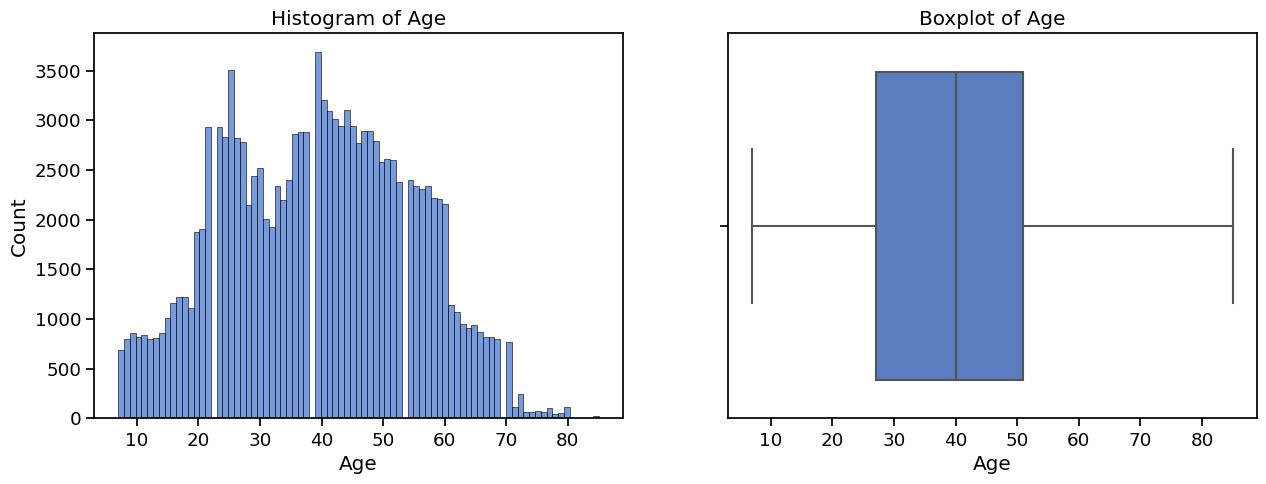

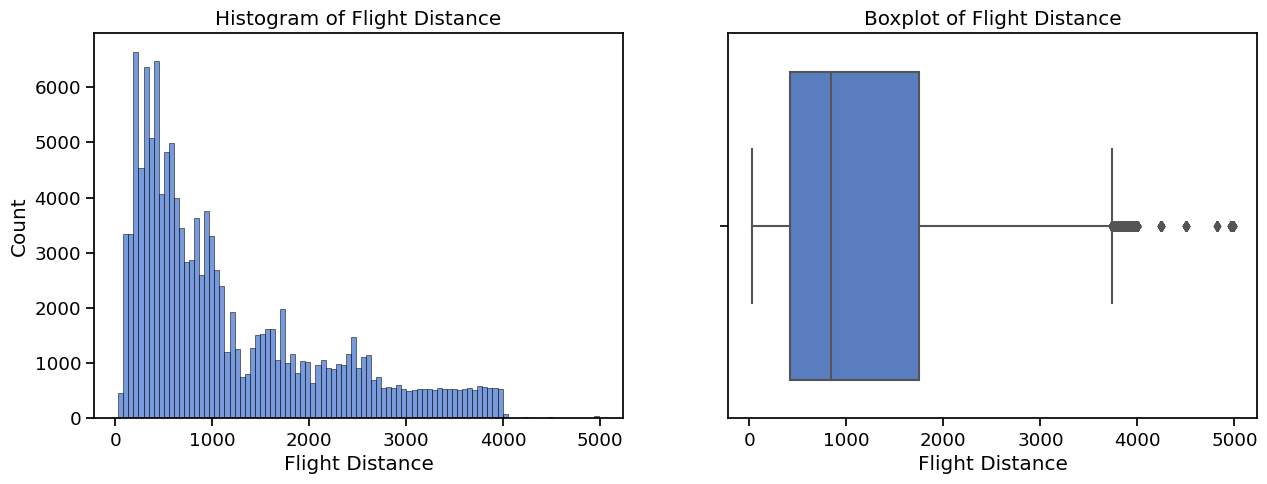

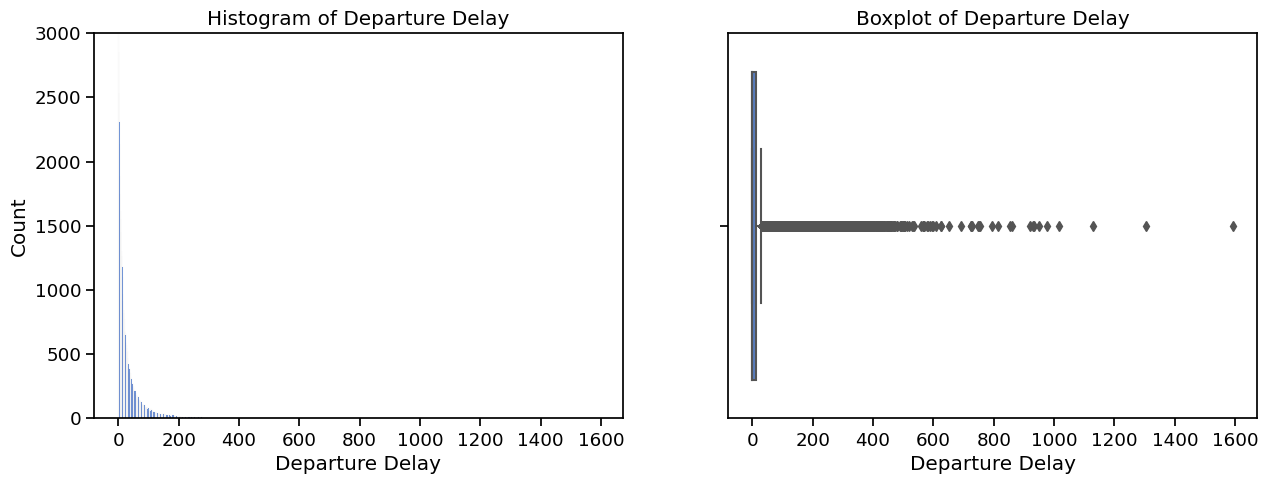

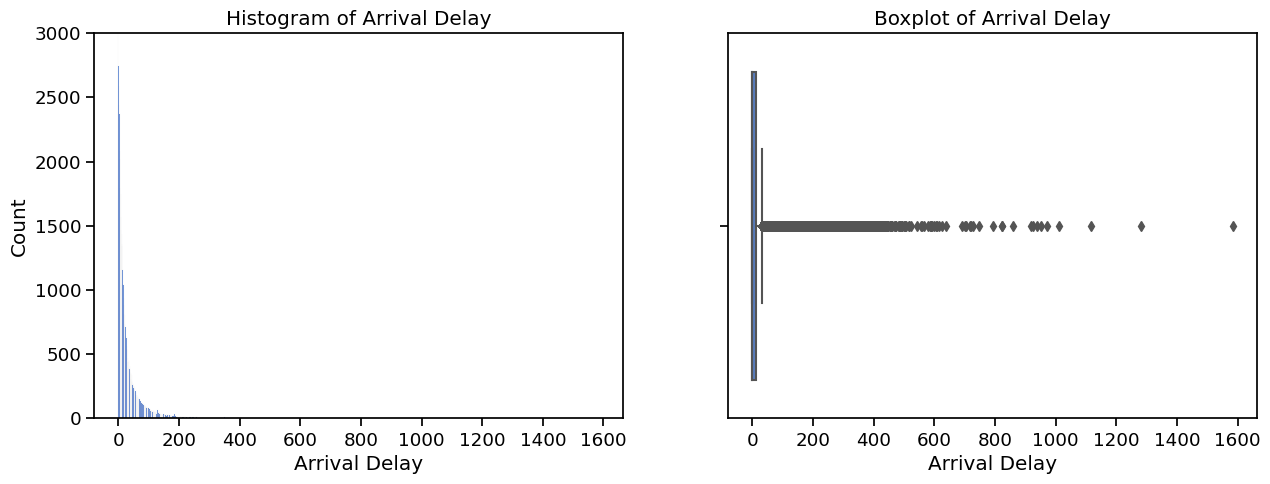

In [37]:
# Set the aesthetic style of the plots and create a color palette
sns.set_context('notebook', font_scale= 1.2)
muted_colors = sns.color_palette('muted')

# Define the actual numerical columns to be plotted
actual_num_columns = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

for col in actual_num_columns:
    # Create a new figure with 2 subplots (1 row, 2 columns) and a size of 15x5
    fig, ax = plt.subplots(1, 2, figsize = (15, 5)) 
    sns.histplot(df[col], ax = ax[0], color= muted_colors[0]) # 1st plot
    sns.boxplot(x = df[col], ax= ax[1], palette= 'muted') # 2nd plot
    
    # Add titles to the plots
    ax[0].set_title(f'Histogram of {col}')
    ax[1].set_title(f'Boxplot of {col}')
    
    # If the column is 'Departure Delay' or 'Arrival Delay', adjust the y-axis limits for better visualization
    if col in ['Departure Delay', 'Arrival Delay']:
        ax[0].set_ylim([0, 3000])  # Adjust the y-axis limits for the histogram

Based on the plots of these numerical variables, we can note that:

- The age distribution of airline passengers is concentrated primarily in the 30-50 age group.
- The majority of flights have distances under 1000 km, while others range from 2000 to over 3000 km, and only a small number exceed 4.000 km.
- An examination of the departure and arrival delay graph reveals that most flights are not delayed. Only a few flights experience delays of less than 3 hours, resulting in highly skewed distributions.

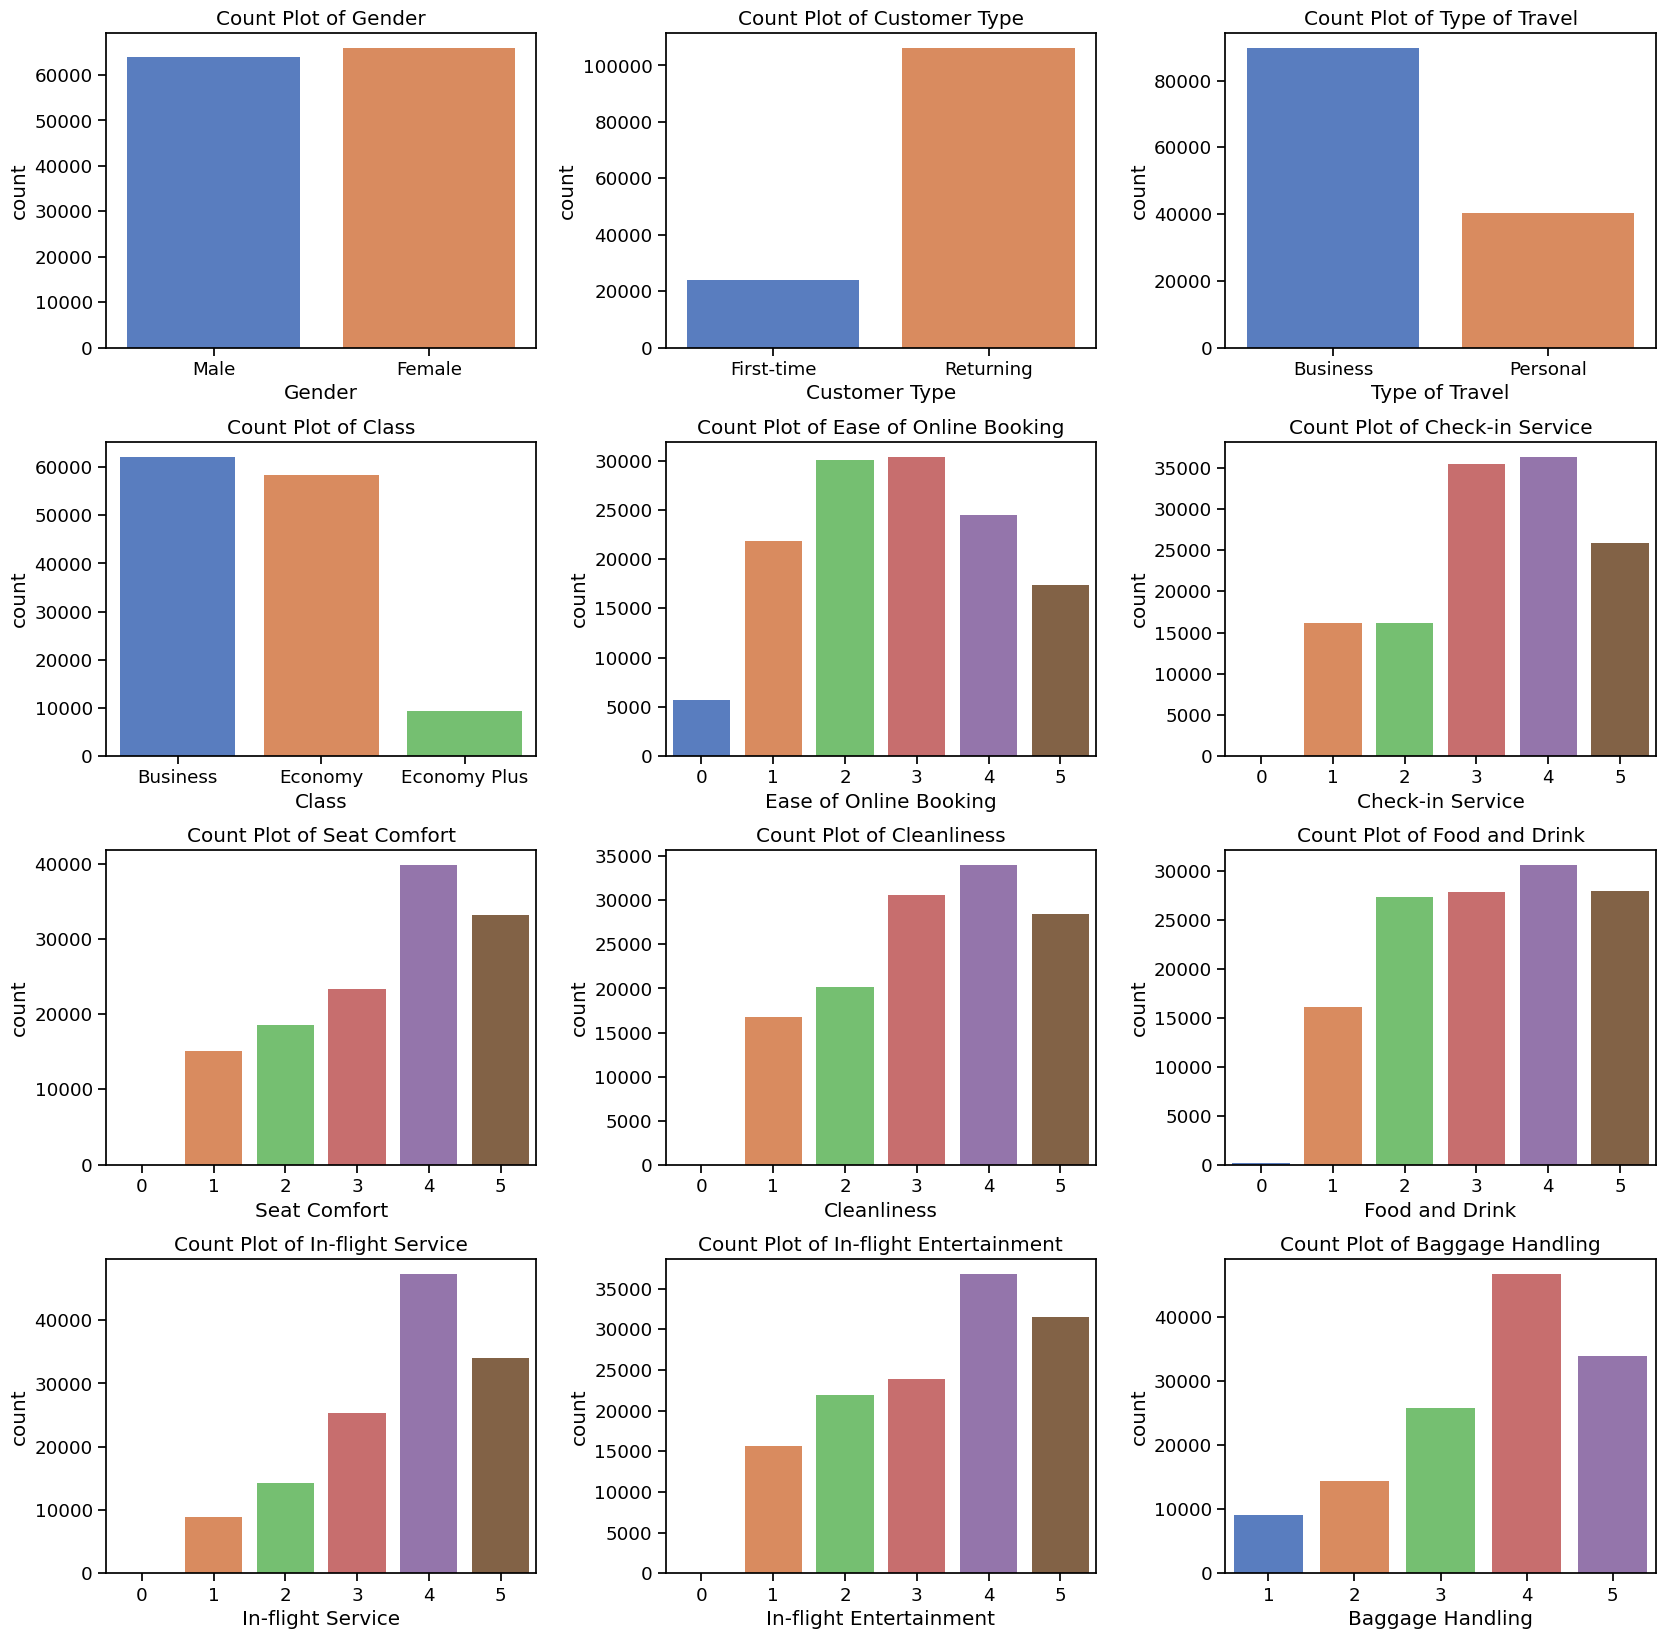

In [38]:
# Plot categorical columns
muted_colors = sns.color_palette('muted')

# List of columns to be plotted
columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Ease of Online Booking', 
           'Check-in Service', 'Seat Comfort', 'Cleanliness', 'Food and Drink', 
           'In-flight Service', 'In-flight Entertainment', 'Baggage Handling']


# Create a figure with a grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 20))

# For each column
for i, column in enumerate(columns):
    # Calculate the row and column indices for the subplot
    row = i // 3
    col = i % 3
    
    # Create a count plot on the subplot
    sns.countplot(x=column, data=df, palette= 'muted', ax=axes[row, col])
    
    # Add a title to the subplot
    axes[row, col].set_title(f'Count Plot of {column}')

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the figure
plt.show()

After visualizing some categorical variables, the following observations can be made:

- Most passengers are frequent flyers, and a significant proportion travel for business purposes compared to personal trips.
- The majority of passengers opt for Business and Economy Class, while the number of passengers using Economy Plus is less than 10.000.
- Regarding airline service ratings, most services receive around 4 points, with only online booking services receiving lower ratings between 2 and 3 points.

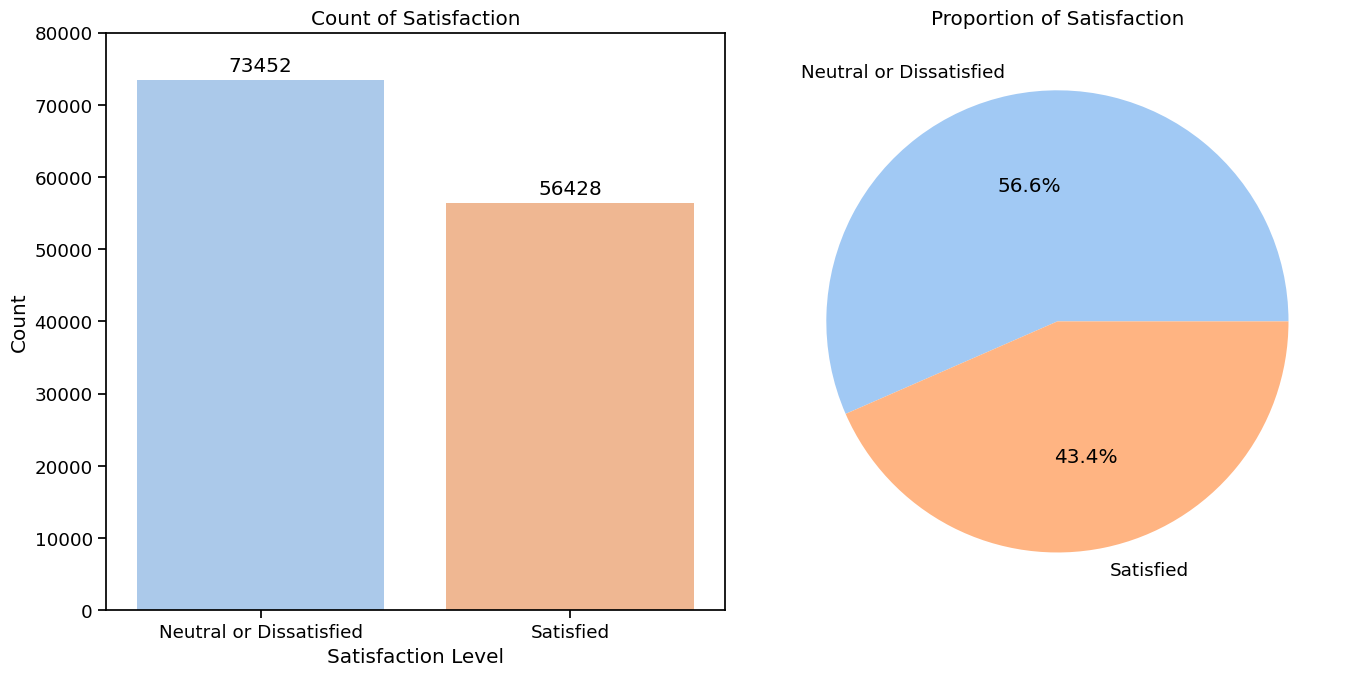

In [39]:
# Set the aesthetic style of the plots and create a color palette.
pastel_colors = sns.color_palette('pastel')

# Create a figure with 2 subplots: one for the bar chart and one for the pie chart
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Create a bar chart of the "Satisfaction" 
bar_plot = sns.countplot(x = df['Satisfaction'], palette = pastel_colors, ax=axes[0])
axes[0].set_title('Count of Satisfaction')
axes[0].set_xlabel('Satisfaction Level') 
axes[0].set_ylabel('Count') 
axes[0].set_ylim([0, 80000])

# Display data labels on the bar chart
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')

# Create a pie chart of the "Satisfaction" 
satisfaction_counts = df['Satisfaction'].value_counts()
axes[1].pie(satisfaction_counts, labels = satisfaction_counts.index, autopct='%1.1f%%', colors = pastel_colors)
axes[1].set_title('Proportion of Satisfaction')

# Show the figure
plt.tight_layout()
plt.show()

The two charts above illustrate the distribution of the target variable 'Satisfaction':

- Among the surveyed passengers, 56428 expressed satisfaction with their flight, while 73452 reported neutral or dissatisfied attitudes.
- The proportion distribution is 56.6% for "Neutral or Dissatisfied" (negative class: 0) and 43.4% for "Satisfied" (positive class: 1).
- The higher frequency of 'Neutral/Dissatisfied' responses is understandable, given that this category encompasses not only dissatisfied passengers but also those who were simply indifferent or felt neutral about their flight experience.
- Although not perfectly balanced, this ratio does not indicate a significant imbalance that would cause the model's predictions to be biased. Therefore, this target variable is acceptable for use in subsequent analysis steps.

#### Bivariate Analysis

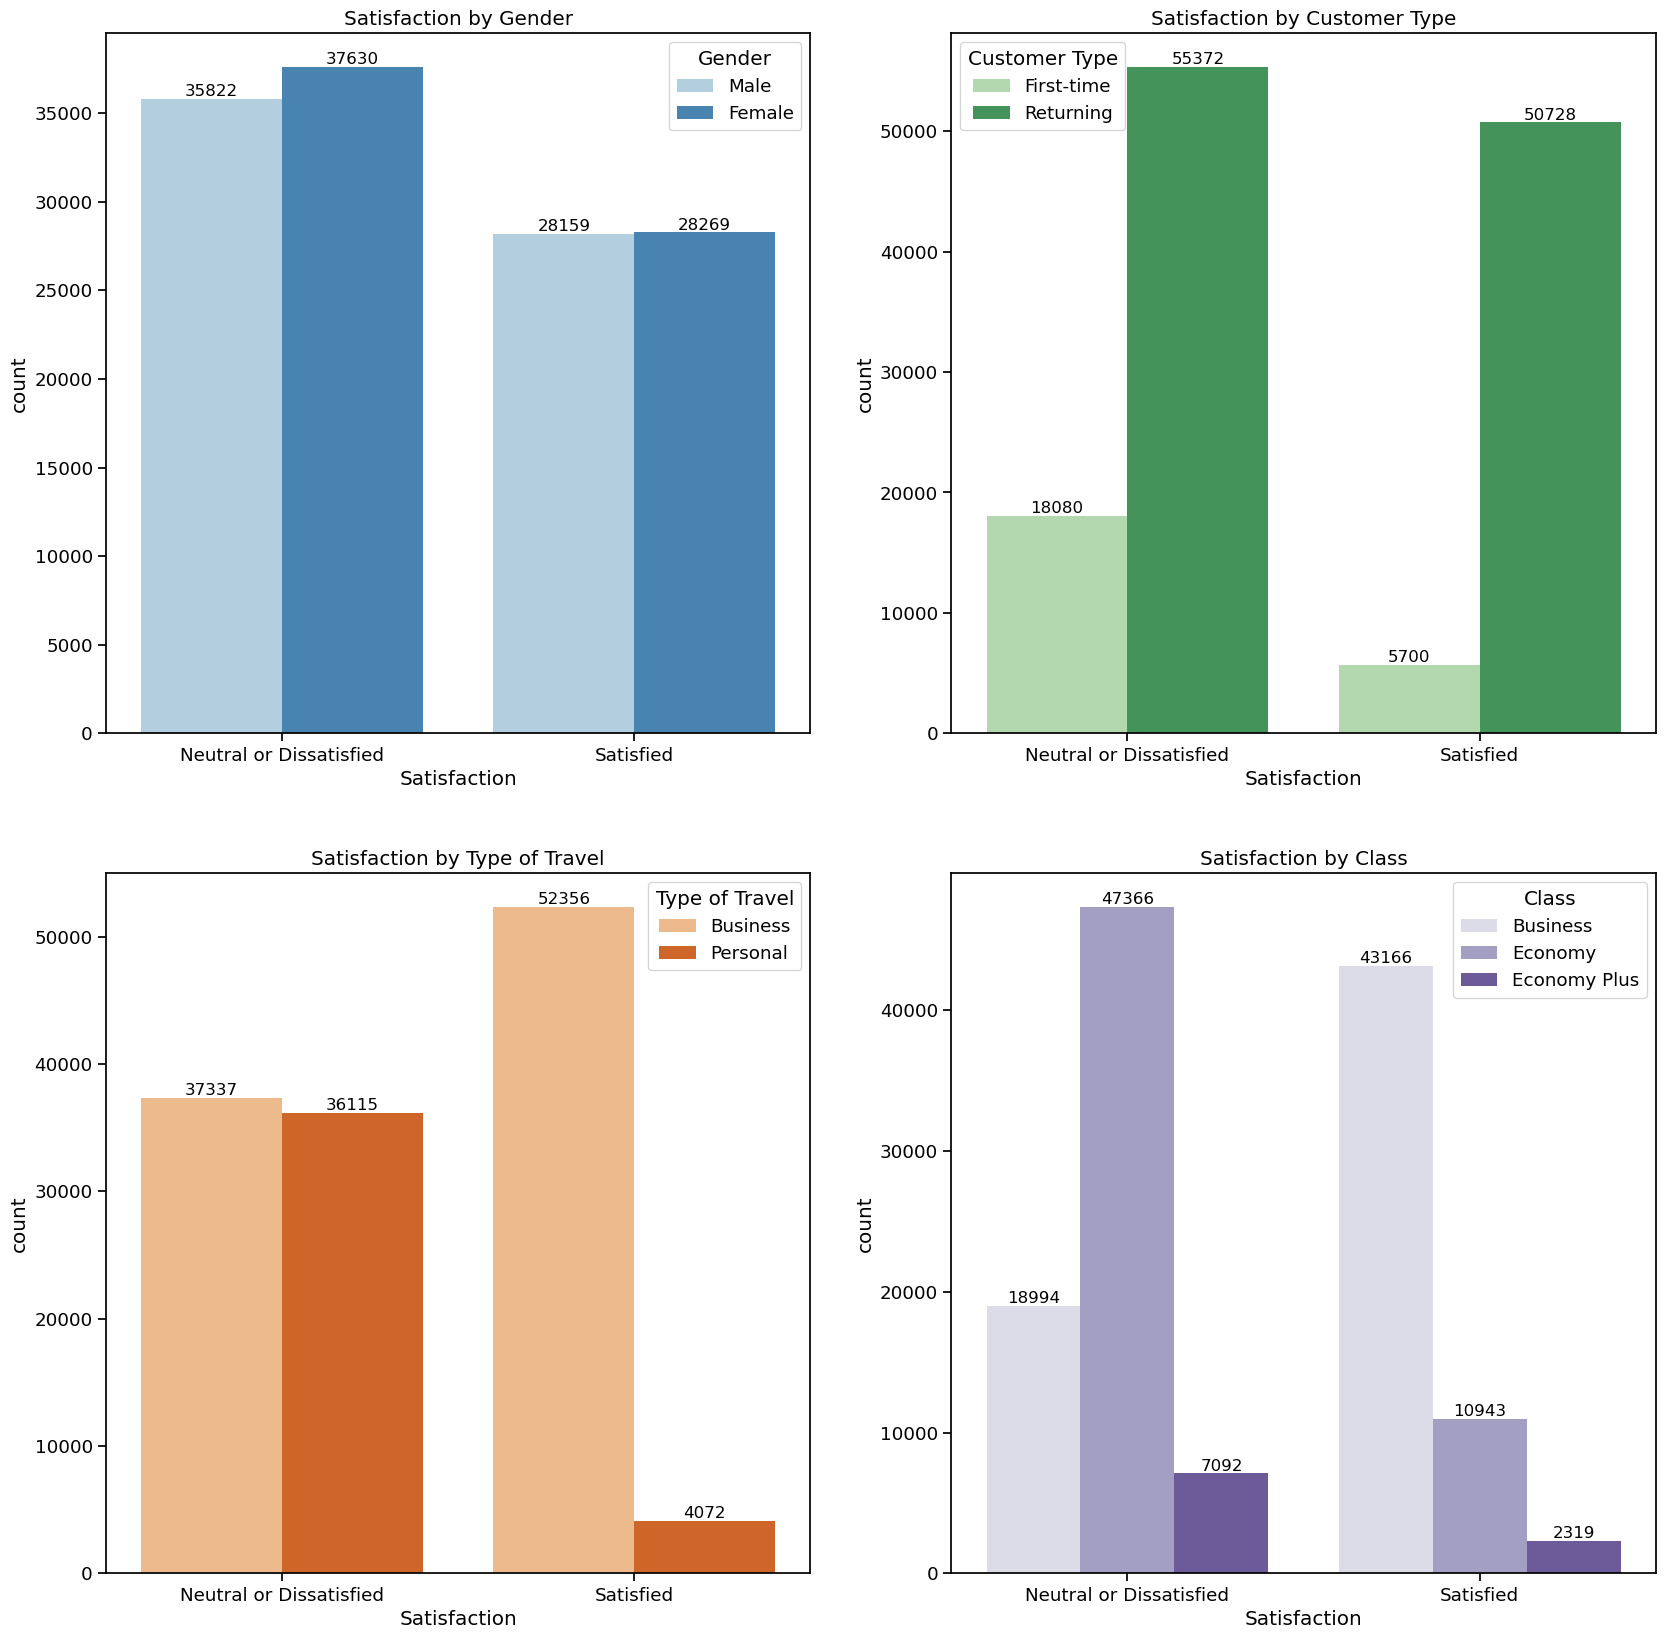

In [40]:
# Create a figure for 4 subplots
fig, axes = plt.subplots(2, 2, figsize = (20,20))

# Plot for 'Gender'
sns.countplot(x='Satisfaction', data=df, hue='Gender', palette= 'Blues', ax=axes[0, 0])
axes[0, 0].set_title('Satisfaction by Gender')  
for p in axes[0, 0].patches:
    axes[0, 0].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

# Plot for 'Customer Type'
sns.countplot(x='Satisfaction', data=df, hue='Customer Type', palette= 'Greens', ax=axes[0, 1])
axes[0, 1].set_title('Satisfaction by Customer Type')  
for p in axes[0, 1].patches:
    axes[0, 1].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

# Plot for 'Type of Travel'
sns.countplot(x='Satisfaction', data=df, hue='Type of Travel', palette= 'Oranges', ax=axes[1, 0])
axes[1, 0].set_title('Satisfaction by Type of Travel')  
for p in axes[1, 0].patches:
    axes[1, 0].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

# Plot for 'Class'
sns.countplot(x='Satisfaction', data=df, hue='Class', palette= 'Purples', ax=axes[1, 1])
axes[1, 1].set_title('Satisfaction by Class')  
for p in axes[1, 1].patches:
    axes[1, 1].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

Upon further analyzing passenger satisfaction across categories such as Gender, Customer Type, Type of Travel, and Class, the following observations can be made:

- In terms of Gender, while the number of satisfied male and female passengers was roughly equal, there were slightly more females than males who reported feeling neutral or dissatisfied.
- Regarding satisfaction by Customer Type, it was found that first-time customers had significantly lower satisfaction rates compared to returning customers.
- Furthermore, when categorized by Type of Travel, it became evident that customers on personal travel expressed lower satisfaction levels  in contrast to those traveling for business purposes.
- Moreover, a satisfied experience was notably more prevalent among Business Class travelers when compared to passengers flying Economy Class and Economy Plus.

#### Data Cleaning and Encoding

In [41]:
# Brief information of the dataset
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [42]:
# Check for NULL values
print (df.isnull().sum())

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

**From the output above, we can note that:**

* The features in our dataset are in both numeric and categorical forms.
* We need to encode those categorical variables, including the target variable `Satisfaction`.
* There are missing values in one column (_Arrival Delay_), so we are going to drop the rows with those values.

In [43]:
# Convert categorical variables to numerical and drop rows with missing values
def gender_encode(x):
    '''
    Convert gender into numerical value.
        Parameters:
        x (str): Gender as 'Male','Female'.

        Returns:
        int: Numerical value of gender (1 for 'Male', 0 for 'Female').
    '''
    if x == 'Male':
        return 1
    else:
        return 0

    
def customer_type_encode(x):
    '''
    Convert customer type into numerical value.
        Parameters:
        x (str): Customer type as 'Returning', 'First-time'.

        Returns:
        int: Numerical value of customer type (1 for 'Returning', 0 for 'First-time').
    '''   
    if x == 'Returning':
        return 1
    else:
        return 0
    
    
def travel_type_encode(x):
    '''
    Convert travel type into numerical value.
        Parameters:
        x (str): Travel type as 'Business', 'Personal'.

        Returns:
        int: Numerical value of travel type (1 for 'Business', 0 for 'Personal').
    ''' 
    if x == 'Business':
        return 1
    else:
        return 0
    
    
def class_encode(x):
    '''
    Convert class into numerical value.
        Parameters:
        x (str): Class as 'Business', 'Economy Plus', 'Economy'.

        Returns:
        int: Numerical value of class (2 for 'Business', 1 for 'Economy Plus', 0 for 'Economy').
    '''
    if x == 'Business':
        return 2
    elif x == 'Economy Plus':
        return 1
    else:
        return 0
    
    
def satisfaction_encode(x):
    '''
    Convert satisfaction level into numerical value.
        Parameters:
        x (str): Satisfaction level as 'Satisfied', 'Neutral or Dissatisfied'. 

        Returns:
        int: Numerical value of satisfaction level (1 for 'Satisfied', 0 for 'Neutral or Dissatisfied').
    '''    
    if x == 'Satisfied':
        return 1
    else:
        return 0


def data_cleaning(df):
    df_copy = df.copy()
    df_copy.dropna(inplace=True)
    df_copy['Gender'] = df_copy['Gender'].apply(gender_encode)
    df_copy['Customer Type'] = df_copy['Customer Type'].apply(customer_type_encode)
    df_copy['Type of Travel'] = df_copy['Type of Travel'].apply(travel_type_encode)
    df_copy['Class'] = df_copy['Class'].apply(class_encode)
    df_copy['Satisfaction'] = df_copy['Satisfaction'].apply(satisfaction_encode)
    
    return df_copy

df_cleaned = data_cleaning(df)

In [44]:
print(df_cleaned.head())

print ('------------------------------------')

# The length of the DataFrame before cleaning data:
print ('The length of the DataFrame before removing the missing data: ', len(df))

# The length of the DataFrame after cleaning data:
print ('The length of the DataFrame after removing the missing data: ', len(df_cleaned))


   Gender  Age  Customer Type  Type of Travel  Class  Flight Distance  Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  Ease of Online Booking  ...  On-board Service  Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  In-flight Service  In-flight Wifi Service  In-flight Entertainment  Baggage Handling  Satisfaction
0       1   48              0               1      2              821                2            5.0                                       3                       3  ...                 3             5                 2            5               5                  5                       3                        5                 5             0
1       0   35              1               1      2              821               26           39.0                                       2                       2  ...                 5             4                 5            5               3                  5                       2        

#### Correlation Analysis

In [45]:
# Calculate correlation matrix
correlation_matrix = df_cleaned.corr()
print (correlation_matrix)


                                          Gender       Age  Customer Type  Type of Travel     Class  Flight Distance  Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  Ease of Online Booking  ...  On-board Service  Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  In-flight Service  In-flight Wifi Service  In-flight Entertainment  Baggage Handling  Satisfaction
Gender                                  1.000000  0.008984       0.030803       -0.009215  0.005732         0.003836         0.003111       0.001309                                0.008772                0.006129  ...          0.006441     -0.030847          0.031031     0.002818        0.001631           0.038176                0.005968                 0.003798          0.036414      0.011496
Age                                     0.008984  1.000000       0.284275        0.044910  0.140691         0.099863        -0.009263      -0.011248                                0.036780                0.

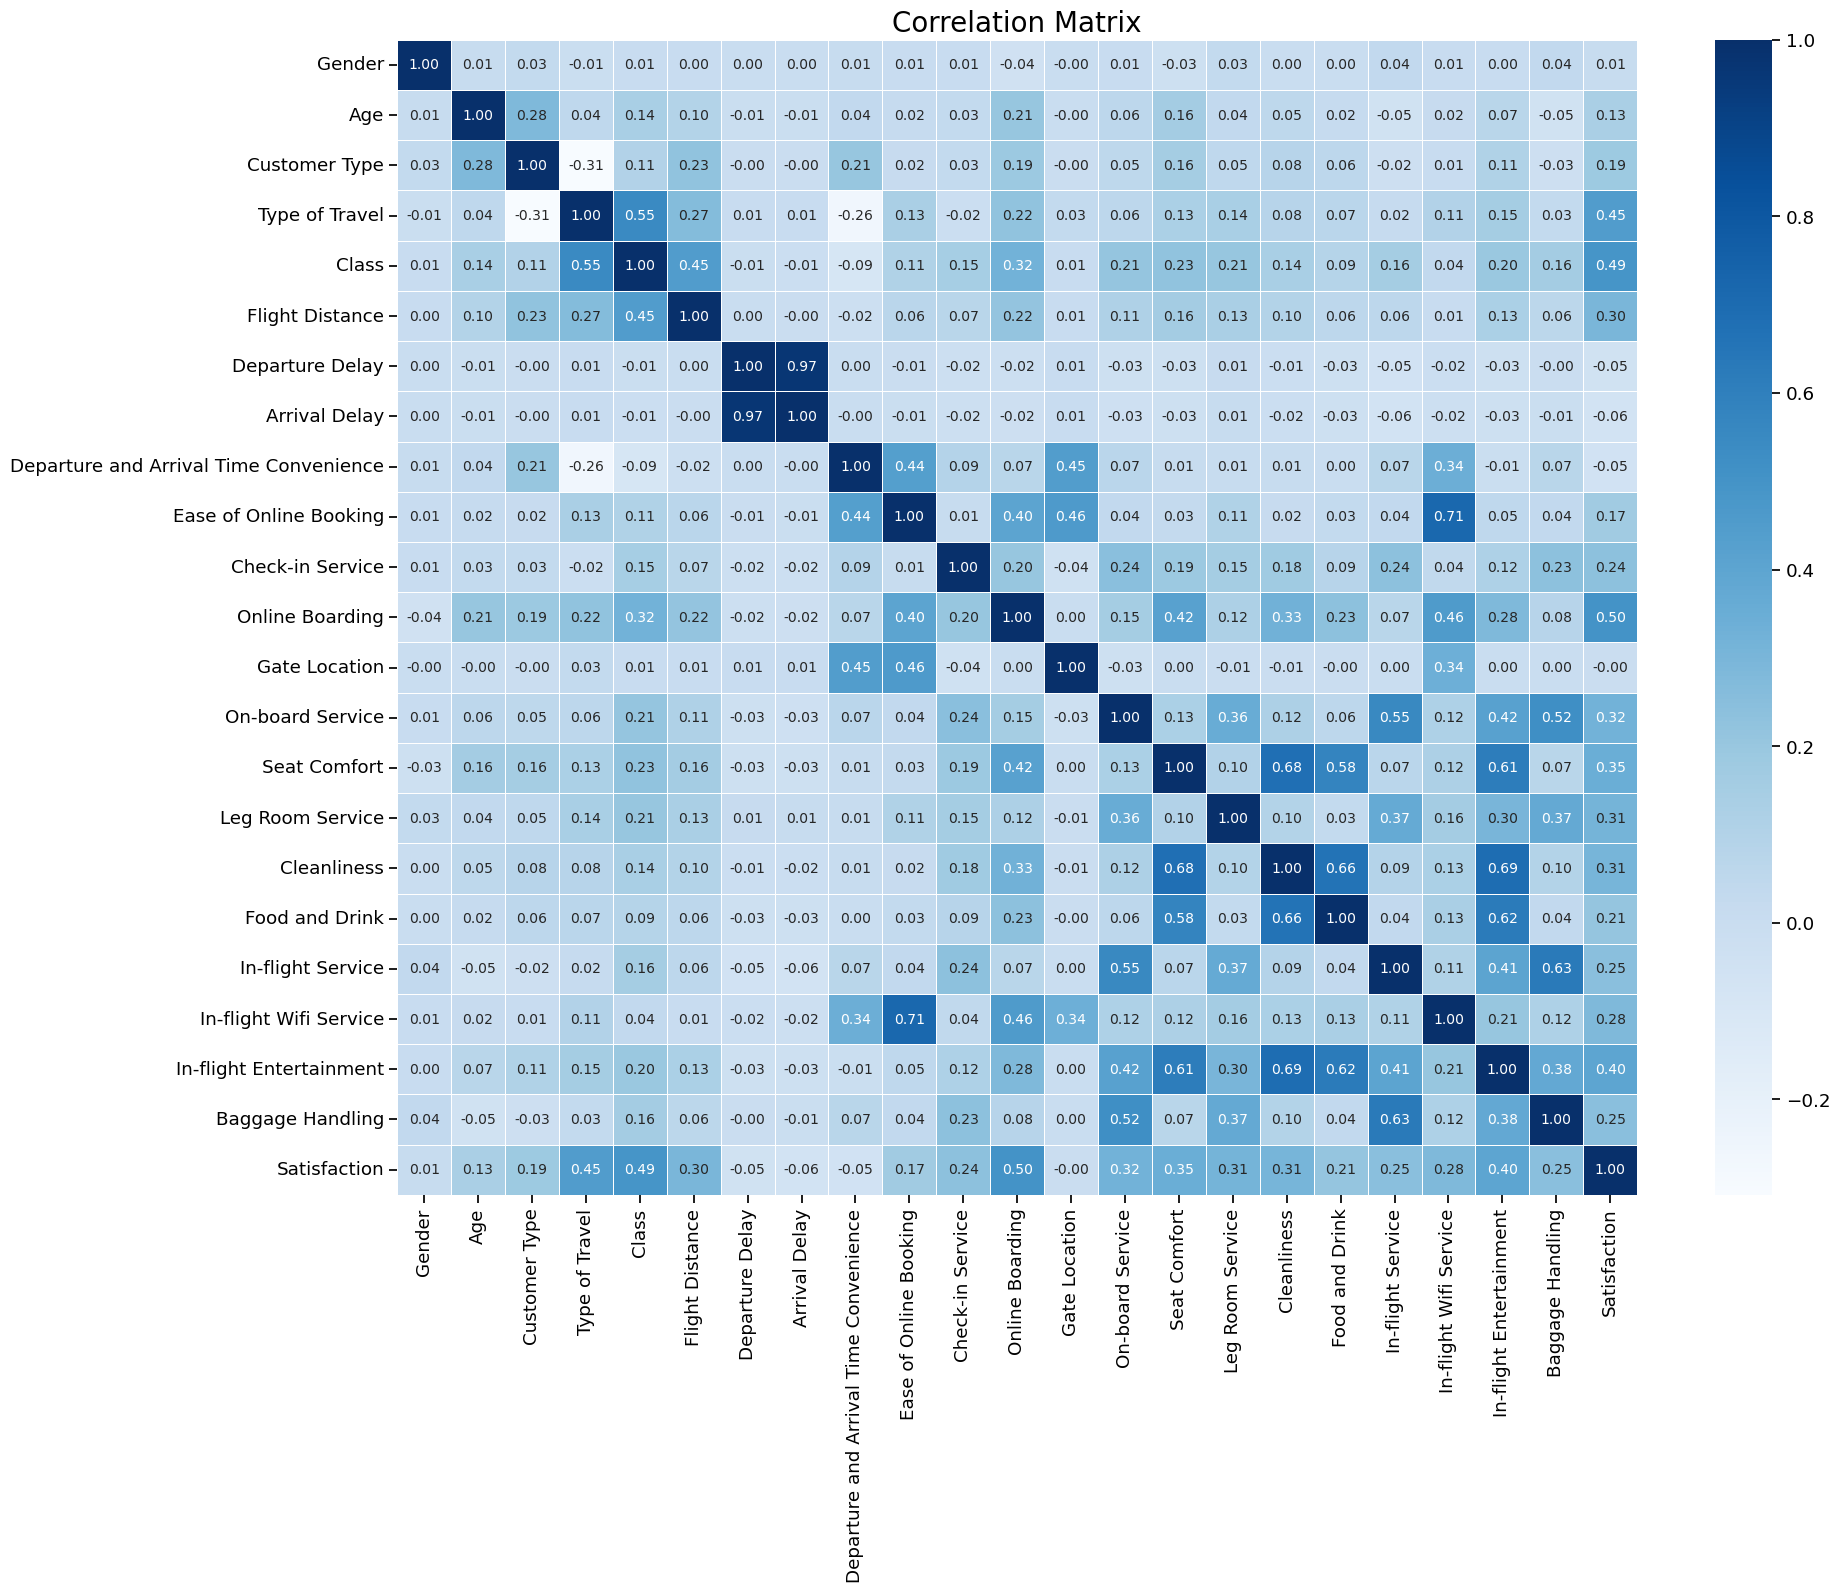

In [46]:
# Correlation matrix plot
plt.figure(figsize=(20,15)) 
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', annot_kws={'size': 10}, linewidths=0.5, cmap='Blues')

plt.title("Correlation Matrix", fontsize =20)
plt.show()

In [47]:
# Correlation between 'Satisfaction' and all other features
target_corr = df_cleaned.corr()[['Satisfaction']].sort_values(by='Satisfaction', ascending=False)

print (target_corr)

                                        Satisfaction
Satisfaction                                1.000000
Online Boarding                             0.501620
Class                                       0.493066
Type of Travel                              0.449794
In-flight Entertainment                     0.398334
Seat Comfort                                0.348576
On-board Service                            0.322329
Leg Room Service                            0.312557
Cleanliness                                 0.306891
Flight Distance                             0.298206
In-flight Wifi Service                      0.283291
Baggage Handling                            0.248651
In-flight Service                           0.245027
Check-in Service                            0.237146
Food and Drink                              0.211164
Customer Type                               0.185925
Ease of Online Booking                      0.168704
Age                                         0.

Text(0.5, 1.0, 'Feature Correlation with Target Variable')

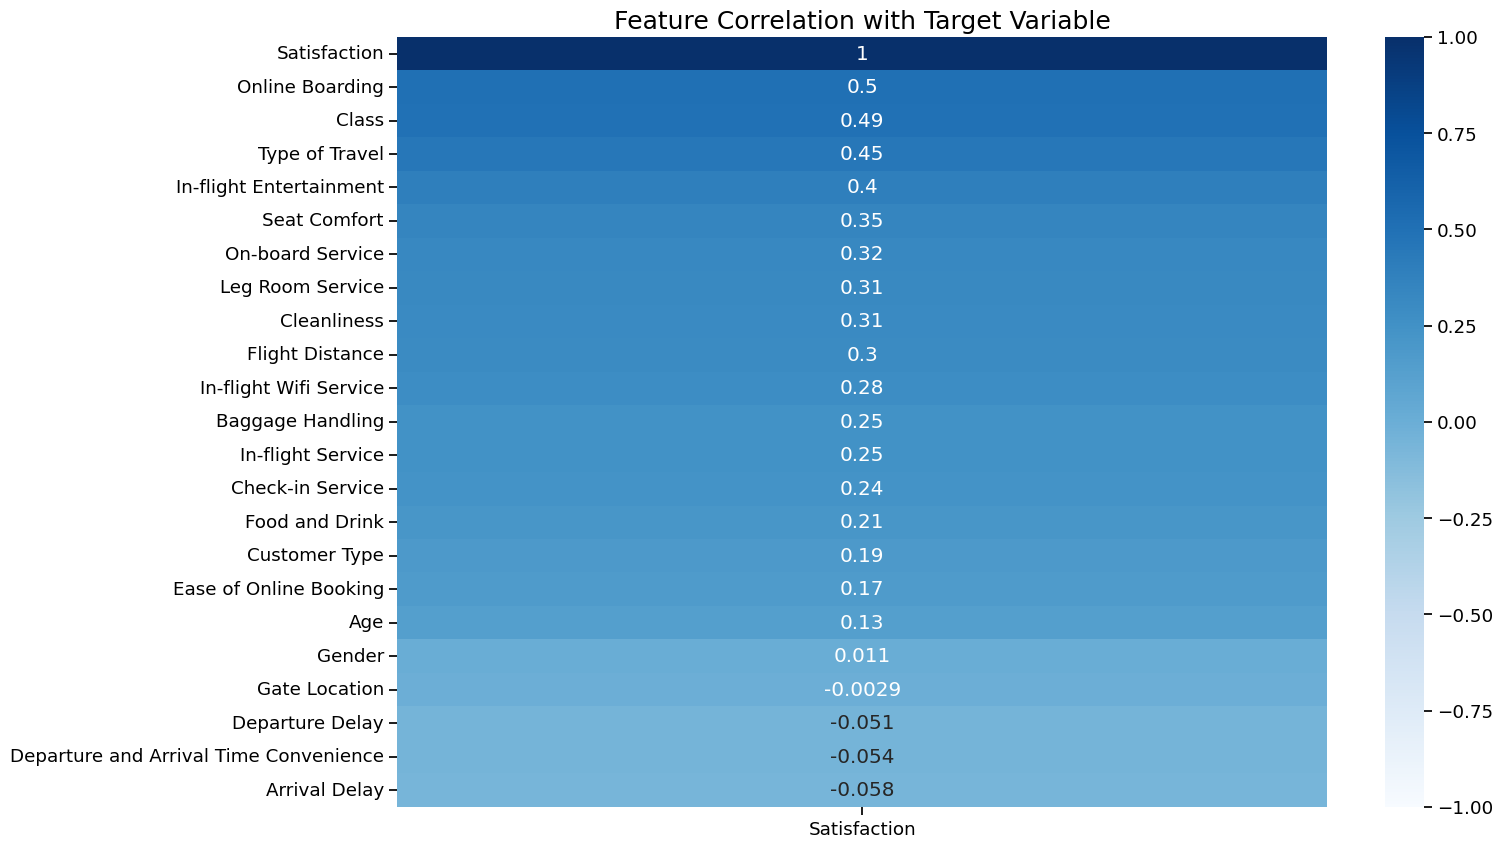

In [48]:
# Plot the correlations of 'Satisfaction' with other variables
plt.figure(figsize=(15, 10))

heatmap = sns.heatmap(target_corr.sort_values(by='Satisfaction', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='Blues')

heatmap.set_title('Feature Correlation with Target Variable', fontdict={'fontsize':18})

Based on the correlation matrix and the bar plot above, we can observe which features correlate well with 'Satisfaction':
- The features most positively correlated with 'Satisfaction' are _Online Boarding_, _Class_, _Type of Travel_ and _In-flight Entertainment_
- _Departure Delay_, _Arrival Delay_, and _Departure and Arrival Time Convenience_ have negative correlations with 'Satisfaction', suggesting that these factors may decrease customer satisfaction. Despite the correlations being relatively modest in magnitude, they represent influential factors that should be taken into account when aiming to enhance customer satisfaction during flights. Thus, we will keep them in for our analysis.
- _Gate Location (-0.002923)_ and _Gender (0.011496)_ have coefficient values close to 0, indicating that they have almost no correlation with 'Satisfaction', so we will exclude these two features from our analysis.


In [49]:
# We will select features for the next steps
selected_features = target_corr.index.tolist()

# Remove 'Satisfaction', 'Gender' and 'Gate Location' from the list
selected_features = [feature for feature in selected_features 
                     if feature not in ['Satisfaction', 'Gender', 'Gate Location']]

for feature in selected_features:
    print(feature)
print('------')
print('Total features:', len(selected_features))

Online Boarding
Class
Type of Travel
In-flight Entertainment
Seat Comfort
On-board Service
Leg Room Service
Cleanliness
Flight Distance
In-flight Wifi Service
Baggage Handling
In-flight Service
Check-in Service
Food and Drink
Customer Type
Ease of Online Booking
Age
Departure Delay
Departure and Arrival Time Convenience
Arrival Delay
------
Total features: 20


### Model Selection and Evaluation

#### Data Splitting: Training - Test

* We use stratified sampling `stratify=y` here to handle the slight imbalance in data that was discovered in the EDA section.
* 56.6% for "Neutral or Dissatisfied" (negative class: 0). 
* 43.4% for "Satisfied" (positive class: 1).

In [50]:
# Split the dataset into training (80%) and testing data (20%) and use random_state = 142
y = df_cleaned['Satisfaction']
train, test = train_test_split(df_cleaned, test_size=0.2, random_state=142, shuffle = True, stratify=y)
print(train.shape)
print(test.shape)

(103589, 23)
(25898, 23)


In [51]:
# Prepare input data and targets for building prediction models
X_train = train[selected_features]
y_train = train['Satisfaction']
X_test = test[selected_features]
y_test = test['Satisfaction']

#### Data Scaling

- As our features may be measured in different units, which could influence the model results due to their varying magnitudes, we need to perform feature scaling.
- Furthermore, the Exploratory Data Analysis revealed the presence of outliers in some variables. Consequently, the `RobustScaler` technique might be useful to scale the features while effectively handling these outliers in the data.
- To avoid data leakage, we will fit the `RobustScaler` on the training data alone, and then transform both the training and test sets using the same scaler instance.

In [52]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaling parameters computed on the training data
X_test_scaled = scaler.transform(X_test)

In [53]:
print("X_train_scaled shape: ", X_train_scaled.shape)
print("y_train shape: ", y_train.shape)
print("X_test_scaled shape: ", X_test_scaled.shape)
print("y_test shape: ", y_test.shape)

X_train_scaled shape:  (103589, 20)
y_train shape:  (103589,)
X_test_scaled shape:  (25898, 20)
y_test shape:  (25898,)


#### Model Preparation

In [54]:
def model_running(model, X_train_scaled, y_train, X_test_scaled, y_test, verbose=True):
    '''
    Train a machine learning model on scaled training data, then evaluates and compares its performance on both the training and test sets.
    
        Function description:
        - The function begins by training the provided model on the scaled training data (X_train_scaled) and corresponding target values (y_train). 
        - After training, it makes predictions on both the training set (X_train_scaled) and the test set (X_test_scaled).    
        - It then computes and prints the accuracy scores, balanced accuracy scores, F1 scores, and ROC AUC scores for both the training and test sets.
        - It also generates and displays the confusion matrices for both sets.
        - Finally, it plots the ROC curves for both the training and test sets, providing a comprehensive view of the model's performance.
        
        Parameters:
        - model: The machine learning model object to be trained and evaluated. It must implement the fit and predict methods.
        - X_train_scaled: Array-like or pandas DataFrame containing the scaled input features for the training data.
        - y_train: Array-like or pandas Series containing the target/output values for the training data.
        - X_test_scaled: Array-like or pandas DataFrame containing the scaled input features for the test set.
        - y_test: Array-like or pandas Series containing the target/output values for the test set.
        - verbose: Boolean, optional (default=True). If True, it will print the progress of the fitting process. If False, the training will proceed without any printed logging or output.
        
        Returns:
        - model: The trained model instance.
        - acc_train: Accuracy score of the model on the training set.
        - acc_test: Accuracy score of the model on the test set.
        - bal_acc_train: Balanced accuracy score of the model on the training set.
        - bal_acc_test: Balanced accuracy score of the model on the test set.
        - f1_train: F1 score of the model on the training set.
        - f1_test: F1 score of the model on the test set.
        - roc_auc_train: ROC AUC score of the model on the training set.
        - roc_auc_test: ROC AUC score of the model on the test set.
        - y_score_test: Target scores, i.e. probability estimates of the positive class for the test set
        
    '''
    
    if verbose == False:
        model.fit(X_train_scaled, y_train, verbose=0)
    else:
        model.fit(X_train_scaled, y_train)
        
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Compute Accuracy scores
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    
    # Compute Balanced Accuracy scores 
    # Since our data is slightly imbalanced, we choose to use this additional metric to ensure the performance of our models. 
    bal_acc_train = balanced_accuracy_score(y_train, y_pred_train)
    bal_acc_test = balanced_accuracy_score(y_test, y_pred_test)
    
    # Compute F1-scores 
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    
    # Compute ROC AUC scores
    y_score_train = model.predict_proba(X_train_scaled)
    roc_auc_train = roc_auc_score(y_train, y_score_train[:, 1])
    
    y_score_test = model.predict_proba(X_test_scaled)
    roc_auc_test = roc_auc_score(y_test, y_score_test[:, 1])
    
    # Create a dictionary with obtained results to make a DataFrame
    results = {
        'Dataset': ['Training', 'Test'],
        'Accuracy': [acc_train, acc_test],
        'Balanced Accuracy': [bal_acc_train, bal_acc_test],
        'F1 Score': [f1_train, f1_test],
        'ROC AUC': [roc_auc_train, roc_auc_test]
    }

    # Convert the dictionary to a pandas DataFrame
    results_df = pd.DataFrame(results)

    # Print our results
    print(results_df.to_string(index=False))
    print ('------------------------------------')
    
    print("Training Set Classification Report:")
    print(classification_report(y_train, y_pred_train, digits=3), '\n')
    print ('------------------------------------')
    print("Test Set Classification Report:")
    print(classification_report(y_test, y_pred_test, digits=3))
 
    # Compute confusion matrices
    cm_train = confusion_matrix(y_train, y_pred_train, normalize ='all')
    cm_test = confusion_matrix(y_test, y_pred_test, normalize = 'all')
    
    # Create subplots
    fig, ax = plt.subplots(2, 2, figsize=(15, 12))
    
    # Adjust the space between subplots
    plt.subplots_adjust(wspace=0.3, hspace = 0.3)
    
    # Plot confusion matrix for training set
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
    disp_train.plot(cmap=plt.cm.Reds, ax=ax[0, 0])
    ax[0, 0].set_title('Confusion Matrix for Training Set')

    # Plot confusion matrix for test set
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
    disp_test.plot(cmap=plt.cm.Blues, ax=ax[0, 1])
    ax[0, 1].set_title('Confusion Matrix for Test Set')

    # Plot ROC curve for training and test set
    RocCurveDisplay.from_estimator(model, X_train_scaled, y_train, ax=ax[1, 0])
    plt.sca(ax[1, 0])
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', linestyle="dashed")
    ax[1, 0].set_title('ROC Curve for Training Set')
    
    RocCurveDisplay.from_estimator(model, X_test_scaled, y_test, ax=ax[1, 1])
    plt.sca(ax[1, 1])
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', linestyle="dashed")
    ax[1, 1].set_title('ROC Curve for Test Set')

    plt.show()
    
    return model, acc_train, acc_test, bal_acc_train, bal_acc_test, f1_train, f1_test, roc_auc_train, roc_auc_test, y_score_test

#### Simple Logistic Regression

 Dataset  Accuracy  Balanced Accuracy  F1 Score  ROC AUC
Training  0.873867           0.869479  0.852061 0.926688
    Test  0.875241           0.871196  0.854085 0.925594
------------------------------------
Training Set Classification Report:
              precision    recall  f1-score   support

           0      0.878     0.903     0.890     58580
           1      0.869     0.836     0.852     45009

    accuracy                          0.874    103589
   macro avg      0.873     0.869     0.871    103589
weighted avg      0.874     0.874     0.874    103589
 

------------------------------------
Test Set Classification Report:
              precision    recall  f1-score   support

           0      0.880     0.902     0.891     14645
           1      0.868     0.840     0.854     11253

    accuracy                          0.875     25898
   macro avg      0.874     0.871     0.873     25898
weighted avg      0.875     0.875     0.875     25898



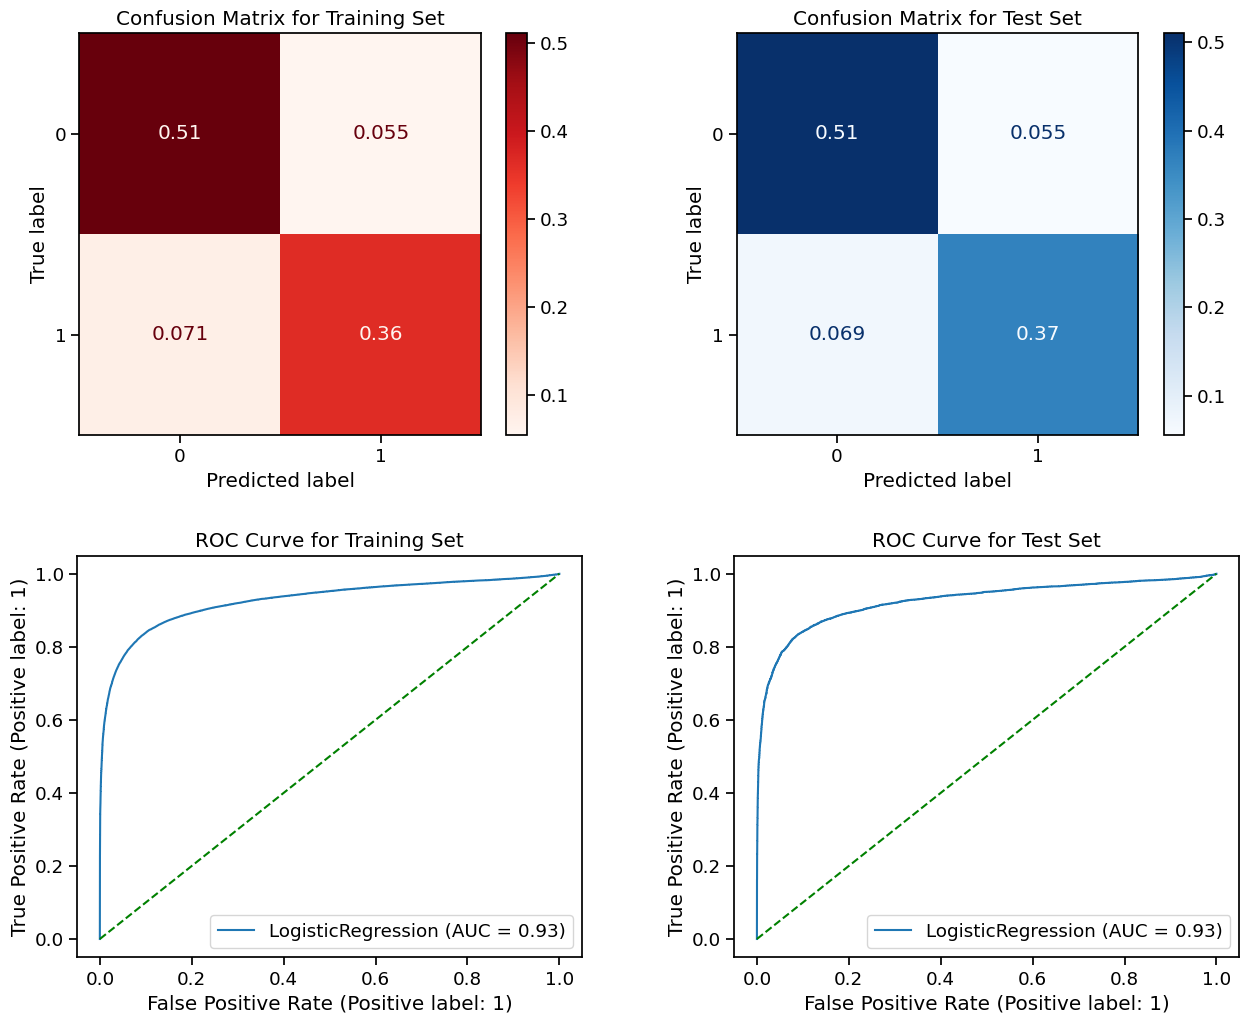

In [55]:
# Train the simple Logistic Regression model as the baseline
logistic_model = LogisticRegression()

# Run the model using our predefined function
model_lr, acc_train_lr, acc_test_lr, bal_acc_train_lr, bal_acc_test_lr, f1_train_lr, f1_test_lr, roc_auc_train_lr, roc_auc_test_lr, y_score_test_lr = model_running(logistic_model, X_train_scaled, y_train, X_test_scaled, y_test)

__Comment on the results of the Simple Logistic Regression model:__
- Overall, the accuracy, balanced accuracy, F1 score, and ROC AUC scores are all 0.85 for both sets.
- The balanced accuracy score is a more informative metric than 'plain' accuracy when dealing with imbalanced datasets. It considers both recall and precision to compute an average accuracy score. 
- The balanced accuracy of 0.871 for the test set suggests that the model performs reasonably well in both classes, not favoring one over the other.
- The classification reports for the training and test sets show that the model has similar precision, recall, and F1-score for both classes (0 and 1).

#### K-Nearest Neighbors (KNN)

##### Train the Simple K-Nearest Neighbors (KNN) model

 Dataset  Accuracy  Balanced Accuracy  F1 Score  ROC AUC
Training  0.956781           0.953964  0.949364 0.993849
    Test  0.922890           0.918462  0.908842 0.957465
------------------------------------
Training Set Classification Report:
              precision    recall  f1-score   support

           0      0.949     0.975     0.962     58580
           1      0.967     0.932     0.949     45009

    accuracy                          0.957    103589
   macro avg      0.958     0.954     0.956    103589
weighted avg      0.957     0.957     0.957    103589
 

------------------------------------
Test Set Classification Report:
              precision    recall  f1-score   support

           0      0.915     0.952     0.933     14645
           1      0.934     0.885     0.909     11253

    accuracy                          0.923     25898
   macro avg      0.925     0.918     0.921     25898
weighted avg      0.923     0.923     0.923     25898



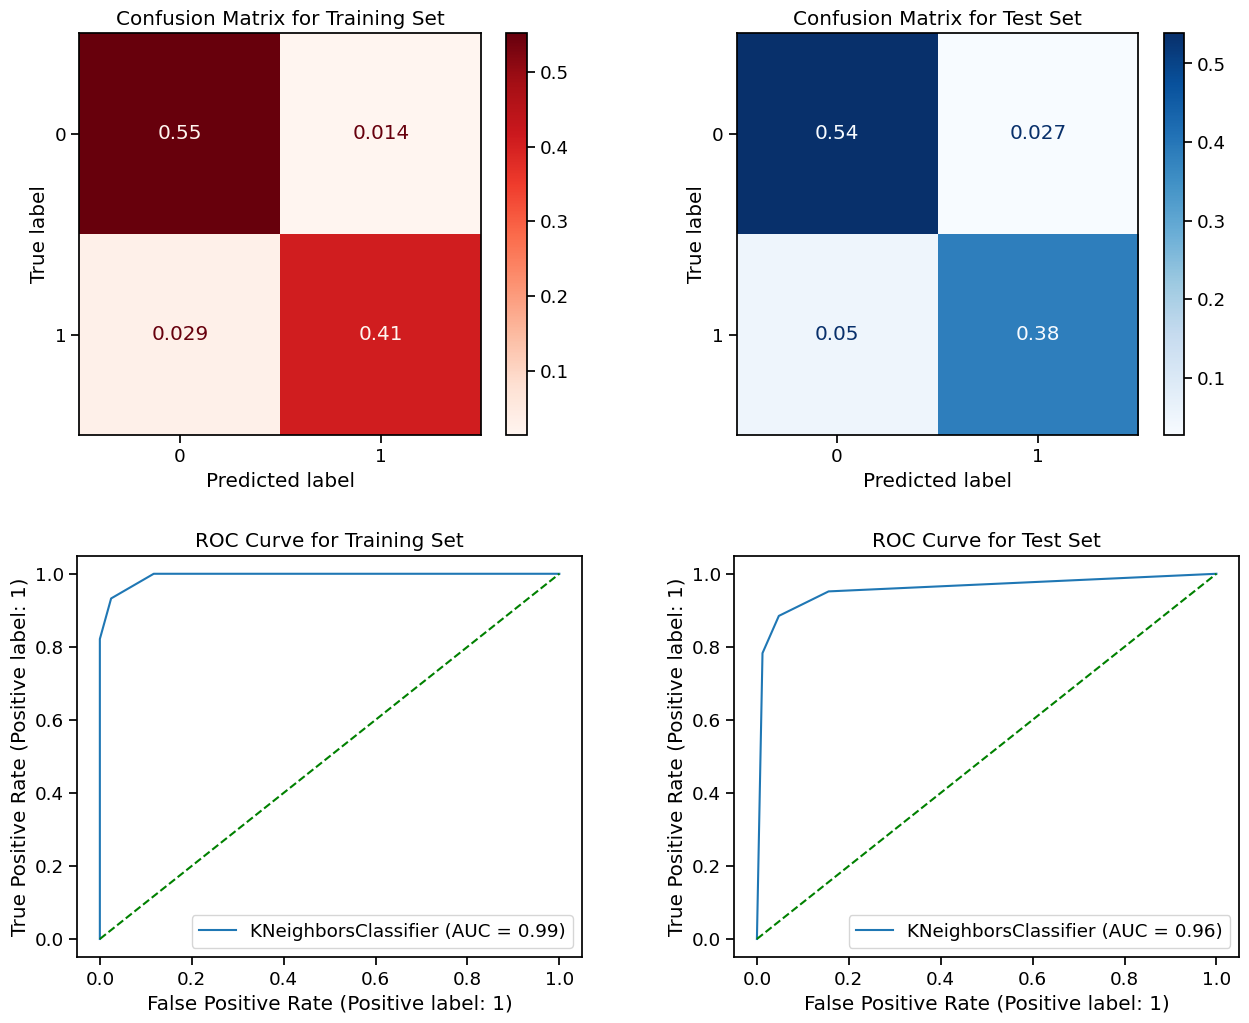

In [56]:
# Train the simple KNN classifier model with an arbitrary K value = 3
K = 3 
knn_model = KNeighborsClassifier(n_neighbors = K)

# Run the model using our predefined function
model_knn, acc_train_knn, acc_test_knn, bal_acc_train_knn, bal_acc_test_knn, f1_train_knn, f1_test_knn, roc_auc_train_knn, roc_auc_test_knn, y_score_test_knn = model_running(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

__Comment on the results of Simple K-Nearest Neighbors (KNN) model:__
- The K-Nearest Neighbors (KNN) model with K = 3 has demonstrated significantly better performance compared to the Simple Logistic Regression model, especially on the training set where it achieved an accuracy of approximately 95%.  
- The evaluation metrics, including accuracy, balanced accuracy, F1 score, and ROC AUC, are all above 0.90 for the test set, indicating the model's high overall performance.
- However, there is a noticeable drop in performance of around 3.4% when moving from the training set to the test set. This could potentially be a sign of overfitting, where the model excels on the training data but generalizes less effectively to unseen data.
- To mitigate this issue, it might be beneficial to employ methods for reducing overfitting, such as tuning the hyperparameter K using techniques like GridSearchCV to find the optimal value of K for our model.

#### Tune Hyperparameter K in K-Nearest Neighbors (KNN)

In [57]:
# Define search space for parameters K
parameter_grid = {'n_neighbors': range(1, 25)}

# Create the machine learning model
knn_clf = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=10)
grid_search_knn.fit(X_train_scaled, y_train)

# Identify the best parameter(s)
best_params = grid_search_knn.best_params_['n_neighbors']
best_score = grid_search_knn.best_score_


print('Best K parameter: ', best_params)
print('Best (cross-validation) accuracy score: %.2f %%' %(100*best_score))

Best K parameter:  9
Best (cross-validation) accuracy score: 92.48 %


#### Visualize Hyperparameter Tuning - KNN

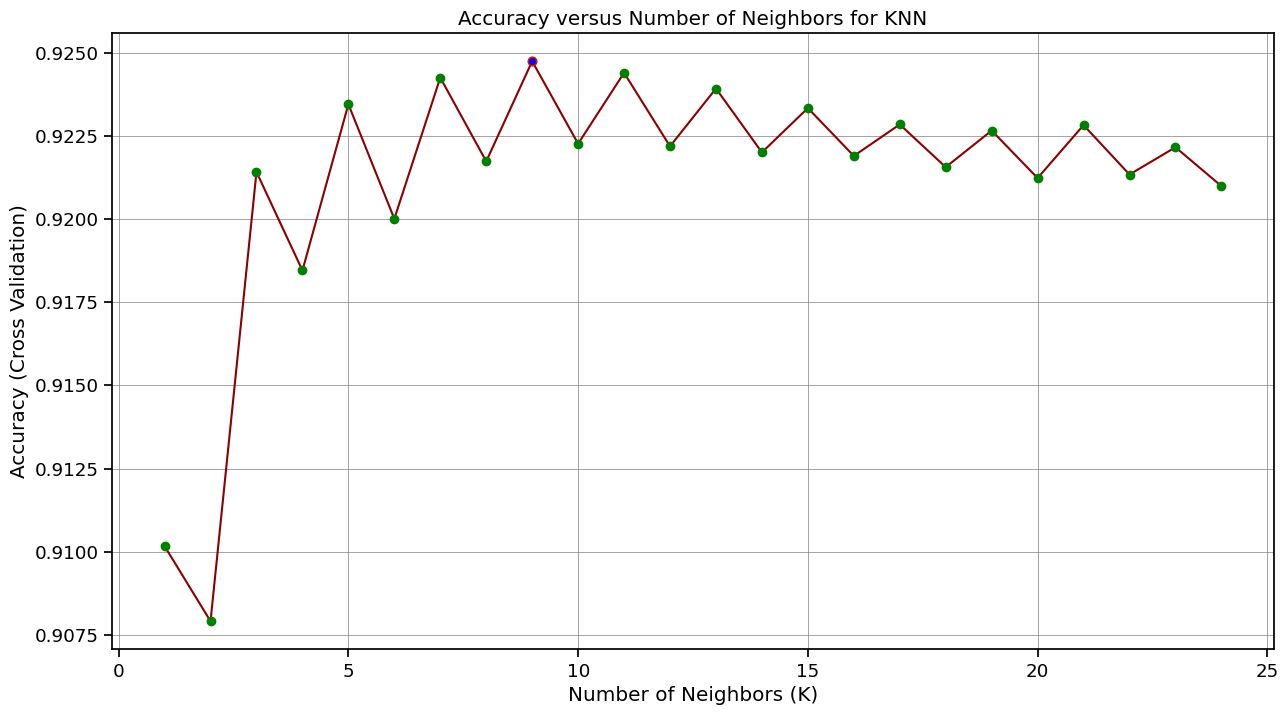

In [63]:
# Visualize the results
results = grid_search_knn.cv_results_ # Get the results of the grid search

# Create a figure plot with some preferences 
plt.figure(figsize=(15, 8), facecolor='white')
plt.gca().set_facecolor('white')
plt.title('Accuracy versus Number of Neighbors for KNN')
plt.xlabel('Number of Neighbors (K)') # Set the labels of the x and y axes
plt.ylabel('Accuracy (Cross Validation)')
plt.grid(True, which='both', color='grey', linewidth=0.5) # Add grid lines

# Plot the mean test scores as the main line graph
plt.plot(range(1, 25), results['mean_test_score'], marker='o', color='darkred', markerfacecolor='green', markeredgecolor='green')

# Highlight the data point for the optimal K 
plt.scatter(best_params, results['mean_test_score'][best_params-1], color='blue', edgecolor='red', zorder=5)


# Show the plot
plt.show()

##### Train the final K-Nearest Neighbors model with Best Hyperparameter K

 Dataset  Accuracy  Balanced Accuracy  F1 Score  ROC AUC
Training  0.938690           0.934026  0.927188 0.988348
    Test  0.926944           0.921635  0.912899 0.974270
------------------------------------
Training Set Classification Report:
              precision    recall  f1-score   support

           0      0.926     0.970     0.947     58580
           1      0.958     0.898     0.927     45009

    accuracy                          0.939    103589
   macro avg      0.942     0.934     0.937    103589
weighted avg      0.940     0.939     0.938    103589
 

------------------------------------
Test Set Classification Report:
              precision    recall  f1-score   support

           0      0.913     0.962     0.937     14645
           1      0.947     0.881     0.913     11253

    accuracy                          0.927     25898
   macro avg      0.930     0.922     0.925     25898
weighted avg      0.928     0.927     0.927     25898



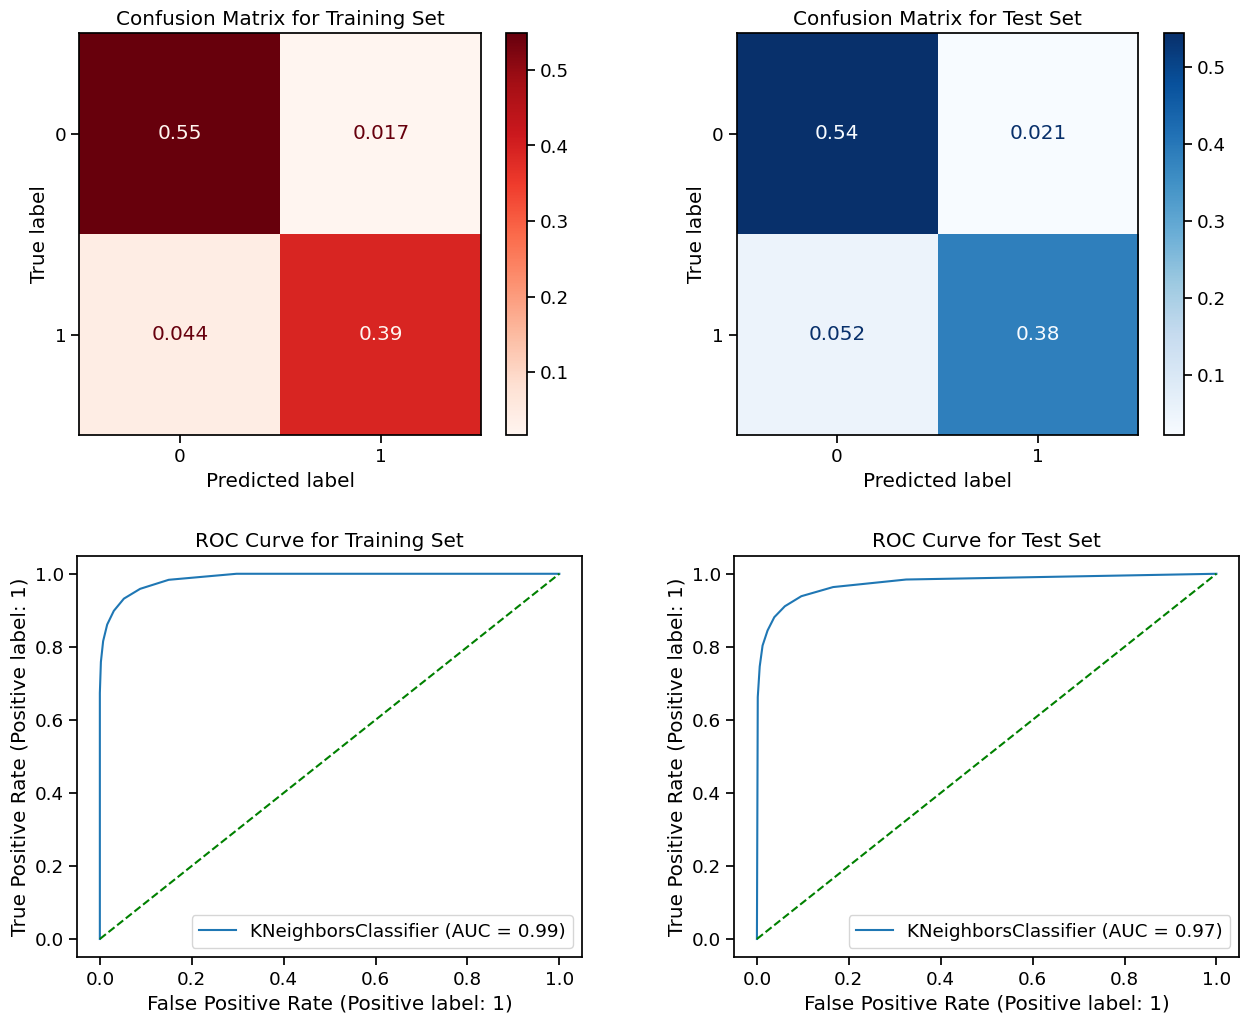

In [59]:
# Train the final KNN classifier model with the best K value
knn_final_model = KNeighborsClassifier(n_neighbors = best_params)

# Run the model using our predefined function
model_knnb, acc_train_knnb, acc_test_knnb, bal_acc_train_knnb, bal_acc_test_knnb, f1_train_knnb, f1_test_knnb, roc_auc_train_knnb, roc_auc_test_knnb, y_score_test_knnb = model_running(knn_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

__Comment on the results of Tuned K-Nearest Neighbors (KNN) model:__
- The K-Nearest Neighbors (KNN) model with the optimized K = 9 has better performance than the Simple KNN model. The evaluation metrics are all above 0.91 for the test set.
- Notably, the ROC AUC score for the test set is 0.974, which is relatively high.
- Moreover, the difference in performance between the training and test sets is smaller compared to the previous model with K = 3. This suggests that the K = 9 model has a lower tendency to overfit and can generalize better to unseen data.

#### Gaussian Naive Bayes (GNB) model

 Dataset  Accuracy  Balanced Accuracy  F1 Score  ROC AUC
Training  0.864329           0.859209  0.840077 0.922586
    Test  0.865241           0.860645  0.841867 0.923395
------------------------------------
Training Set Classification Report:
              precision    recall  f1-score   support

           0      0.867     0.898     0.882     58580
           1      0.861     0.820     0.840     45009

    accuracy                          0.864    103589
   macro avg      0.864     0.859     0.861    103589
weighted avg      0.864     0.864     0.864    103589
 

------------------------------------
Test Set Classification Report:
              precision    recall  f1-score   support

           0      0.870     0.896     0.883     14645
           1      0.859     0.826     0.842     11253

    accuracy                          0.865     25898
   macro avg      0.864     0.861     0.862     25898
weighted avg      0.865     0.865     0.865     25898



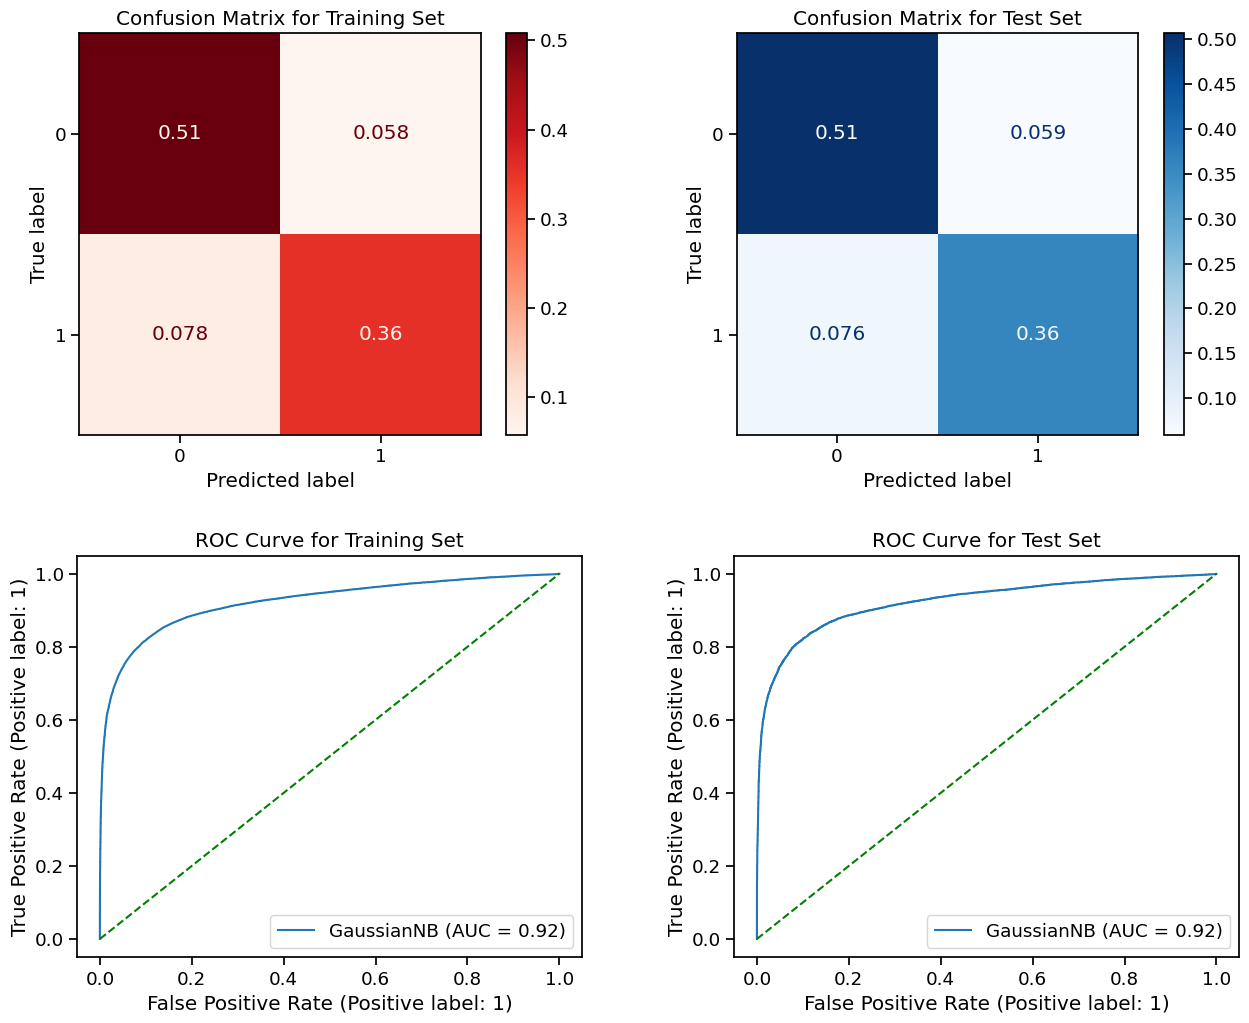

In [60]:
# Create and training a Gaussian Naive Bayes classifier model
gnb_model = GaussianNB()

# Run the model using our predefined function
model_gnb, acc_train_gnb, acc_test_gnb, bal_acc_train_gnb, bal_acc_test_gnb, f1_train_gnb, f1_test_gnb, roc_auc_train_gnb, roc_auc_test_gnb, y_score_test_gnb = model_running(gnb_model, X_train_scaled, y_train, X_test_scaled, y_test)

__Comment on the results of Naive Bayes Classifier (GaussianNB):__
- The Gaussian Naive Bayes (GNB) model achieves an accuracy, balanced accuracy, F1 score, and ROC AUC above 0.86 on the test set.
- The model's performance remains relatively consistent between the training and test sets, which means the model is less sensitive to overfitting issues.
- Overall, the GNB model performs well on the provided data. However, when compared to the KNN model with K = 9, the GNB model demonstrates lower performance scores.

### Model Comparison

#### Performance Metrics Comparison 

In [61]:
acc_scores = [acc_test_lr, acc_test_knn, acc_test_knnb, acc_test_gnb]
bal_acc_scores = [bal_acc_test_lr, bal_acc_test_knn, bal_acc_test_knnb, bal_acc_test_gnb]
f1_scores = [f1_test_lr, f1_test_knn, f1_test_knnb, f1_test_gnb]
roc_auc_scores = [roc_auc_test_lr, roc_auc_test_knn, roc_auc_test_knnb, roc_auc_test_gnb]

model_names = ['Logistic Regression', 'Simple K-Nearest Neighbors (KNN)', 'Tuned K-Nearest Neighbors (KNN)', 'Gaussian Naive Bayes (GNB)']
model_scores = pd.DataFrame({
    'Test Set Accuracy': acc_scores,
    'Test Set Balanced Accuracy': bal_acc_scores,
    'Test Set F1-Score': f1_scores,
    'Test Set ROC AUC': roc_auc_scores
}, index= model_names)

print(model_scores.head())

                                  Test Set Accuracy  Test Set Balanced Accuracy  Test Set F1-Score  Test Set ROC AUC
Logistic Regression                        0.875241                    0.871196           0.854085          0.925594
Simple K-Nearest Neighbors (KNN)           0.922890                    0.918462           0.908842          0.957465
Tuned K-Nearest Neighbors (KNN)            0.926944                    0.921635           0.912899          0.974270
Gaussian Naive Bayes (GNB)                 0.865241                    0.860645           0.841867          0.923395


__The Performance Metrics table highlights the evaluation of each model on the test set:__

- The Gaussian Naive Bayes (GNB) model has the lowest accuracy, balanced accuracy, F1-score, and ROC AUC score among all the models. This suggests that the GNB model, while simple and computationally efficient, might not be the best choice for this particular dataset.

- Despite having the second lowest accuracy, balanced accuracy, F1-score, and ROC AUC score, the Logistic Regression model is better than the GNB model in all criteria. 

- The Simple K-Nearest Neighbors (KNN) and the Tuned K-Nearest Neighbors (KNN) models outperform the Logistic Regression and GNB models in all metrics. 

- The Tuned KNN model with K = 9 has the highest values of accuracy, balanced accuracy, F1-score, and ROC AUC score among all models, which allows us to conclude that it is the best-performing model for this data.

#### ROC Curve (AUC) Comparison

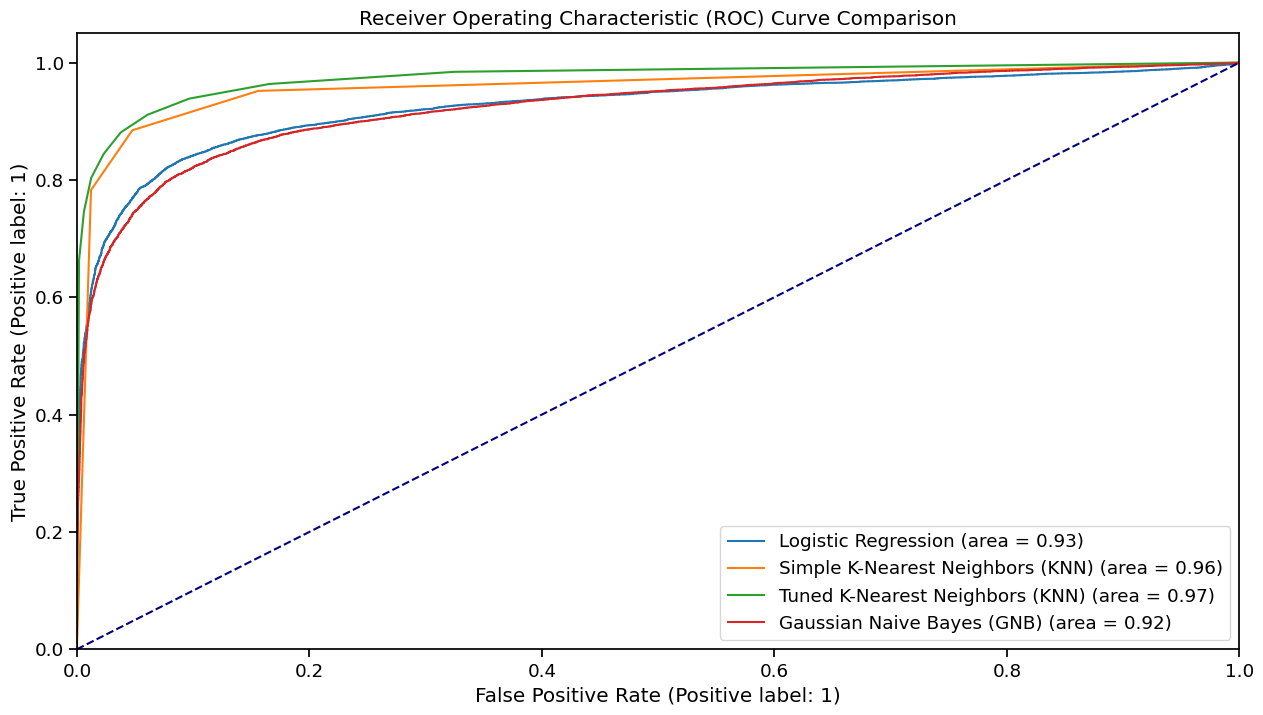

In [64]:
# Define a list of obtained models and their corresponding y_score_test
models = [(model_lr, y_score_test_lr), (model_knn, y_score_test_knn), (model_knnb, y_score_test_knnb), (model_gnb, y_score_test_gnb)]

plt.figure(figsize=(15, 8))
for (model, y_score_test), name in zip(models, model_names):
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score_test[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

# Plot Random Guessing Line (RGL)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set plot labels and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Positive label: 1)')
plt.ylabel('True Positive Rate (Positive label: 1)')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")

plt.show()

__We can make some remarks on the effectiveness of our models by comparing their Receiver Operating Characteristic (ROC) curves:__

1. Logistic Regression: The logistic regression model has an AUC (Area Under the Curve) of 0.93, which is relatively good. The curve is close to the top-left corner, which is a good balance between true positive and false positive rates across different threshold settings.

2. Simple K-Nearest Neighbors (KNN): The simple KNN model has a higher AUC of 0.96, outperforming the logistic regression model. Its ROC curve is positioned even closer to the top-left corner, suggesting better overall performance.

3. Tuned K-Nearest Neighbors (KNN): The tuned KNN model has an AUC of 0.97, which is the highest among all models. Its ROC curve is the closest to the top-left corner. This position reflects its best performance in achieving high true positive rates while maintaining low false positive rates.

4. Gaussian Naive Bayes (GNB): The GNB model has an AUC of 0.92, which is decent but still lower when compared to other models. Its ROC curve is farther from the top-left corner, which indicates a less favorable balance between true positive and false positive rates.

In short, the comparison of ROC curves is consistent with the previously mentioned performance metrics. The optimized K-Nearest Neighbors model demonstrates the best overall performance, followed by the simple K-Nearest Neighbors model, Logistic Regression, and the Gaussian Naive Bayes model at the end.
